In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, AveragePooling2D, InputLayer, Flatten, Dense, Dropout, Add
import cv2
import matplotlib.pyplot as plt


# --- QUESTION 2: Convolution Operations ---


In [27]:
# Define the 5x5 input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    [6, 7, 8, 9, 0],
    [0, 9, 8, 7, 6],
    [1, 3, 5, 7, 9]
], dtype=np.float32).reshape((1, 5, 5, 1))

# Define the 3x3 kernel
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32).reshape((3, 3, 1, 1))

# Define a single reusable model
def build_model(stride, padding):
    model = Sequential([
        Input(shape=(5, 5, 1)),  # Input Layer
        Conv2D(filters=1, kernel_size=(3, 3), strides=stride, padding=padding, use_bias=False)
    ])
    model.layers[0].set_weights([kernel])
    return model

# Apply convolution using the same model instance to prevent retracing

def apply_convolution(model):
    output = model.predict(input_matrix)
    return output[0, :, :, 0]

# Running for different stride and padding values
for stride, padding in [(1, 'valid'), (1, 'same'), (2, 'valid'), (2, 'same')]:
    model = build_model(stride, padding)
    output_feature_map = apply_convolution(model)
    print(f"\nStride = {stride}, Padding = '{padding}'")
    print(output_feature_map)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Stride = 1, Padding = 'valid'
[[ -2.  -2.   8.]
 [ -8.   2.  12.]
 [-14.  -4.   6.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Stride = 1, Padding = 'same'
[[ -6.   0.   0.   0.   6.]
 [-13.  -2.  -2.   8.  15.]
 [-20.  -8.   2.  12.  18.]
 [-19. -14.  -4.   6.  23.]
 [-12. -12.  -2.  -2.  14.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Stride = 2, Padding = 'valid'
[[ -2.   8.]
 [-14.   6.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Stride = 2, Padding = 'same'
[[ -6.   0.   6.]
 [-20.   2.  18.]
 [-12.  -2.  14.]]


# --- QUESTION 3: Edge Detection and Pooling ---


Original Matrix:
 [[0.06940649 0.33341244 0.99930555 0.8064596 ]
 [0.87397027 0.46038944 0.11060197 0.9108554 ]
 [0.30889967 0.50056213 0.28103638 0.11681932]
 [0.03908333 0.10360904 0.31086668 0.07527618]]

Max Pooled Matrix:
 [[0.87397027 0.99930555]
 [0.50056213 0.31086668]]

Average Pooled Matrix:
 [[0.43429467 0.7068056 ]
 [0.23803854 0.19599965]]


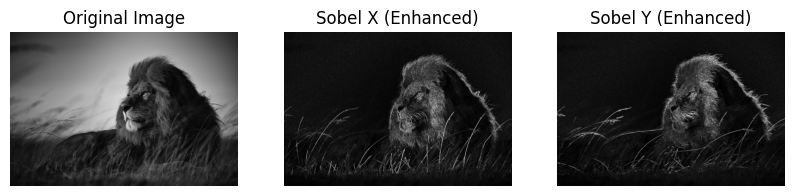

In [28]:
# --- TASK 1: EDGE DETECTION USING SOBEL FILTER ---

def apply_sobel_filter(image_path):
    """Applies Sobel filter for edge detection in X and Y directions with improved visibility."""
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel filters
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X-direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y-direction

    # Convert to absolute values to enhance visibility
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)

    # Display images using matplotlib
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Sobel X (Enhanced)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Sobel Y (Enhanced)")
    plt.axis("off")

    plt.show()

# --- TASK 2: MAX POOLING AND AVERAGE POOLING ---

# Generate a random 4x4 matrix (as a sample input image)
input_matrix = np.random.rand(1, 4, 4, 1).astype(np.float32)

# Define a model with both MaxPooling and AveragePooling
model_pooling = Sequential([
    InputLayer(input_shape=(4, 4, 1)),  # Input layer
    MaxPooling2D(pool_size=(2,2), strides=2, name='max_pooling'),  # Max Pooling
    AveragePooling2D(pool_size=(2,2), strides=2, name='avg_pooling')  # Avg Pooling
])

# Get the outputs
max_pooled_output = model_pooling.get_layer('max_pooling')(input_matrix).numpy()
avg_pooled_output = model_pooling.get_layer('avg_pooling')(input_matrix).numpy()

# Print results
print("\nOriginal Matrix:\n", input_matrix[0, :, :, 0])
print("\nMax Pooled Matrix:\n", max_pooled_output[0, :, :, 0])
print("\nAverage Pooled Matrix:\n", avg_pooled_output[0, :, :, 0])

# Example usage (Upload an image and provide the correct path)
apply_sobel_filter("/content/Bob-Junior.jpg")

# --- QUESTION 4: CNN Architectures ---

In [29]:
# --- TASK 1: IMPLEMENT ALEXNET ---

def build_alexnet():
    """Builds a simplified AlexNet model."""
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(256, (5, 5), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(384, (3, 3), activation='relu', padding="same"),
        Conv2D(384, (3, 3), activation='relu', padding="same"),
        Conv2D(256, (3, 3), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes output
    ])

    return model

# Create AlexNet model and print summary
alexnet_model = build_alexnet()
print("\nAlexNet Model Summary:")
alexnet_model.summary()


# --- TASK 2: IMPLEMENT RESNET-LIKE MODEL ---

def residual_block(input_tensor, filters):
    """Defines a simple residual block with skip connections."""
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(input_tensor)
    x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = Add()([x, input_tensor])  # Skip connection (adds input to output)
    return x

def build_resnet():
    """Builds a simple ResNet-like model."""
    inputs = Input(shape=(32, 32, 3))  # CIFAR-10 size input
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)  # 10 classes output

    model = Model(inputs, outputs)
    return model

# Create ResNet-like model and print summary
resnet_model = build_resnet()
print("\nResNet-like Model Summary:")
resnet_model.summary()



AlexNet Model Summary:


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)


ResNet-like Model Summary:


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45            │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_93 (Conv2D)        │ (None, 16, 16, 64)     │          9,472 │ input_layer_45[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_93[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_94[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 16, 16, 64)     │              0 │ conv2d_95[0][0],       │
│                           │                        │                │ conv2d_93[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_96[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 16, 16, 64)     │              0 │ conv2d_97[0][0],       │
│                           │                        │                │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 16384)          │              0 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 128)            │      2,097,280 │ flatten_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 10)             │          1,290 │ dense_32[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,255,754 (8.61 MB)

 Trainable params: 2,255,754 (8.61 MB)

 Non-trainable params: 0 (0.00 B)